In [87]:
import pandas as pd
import seaborn as sns
import numpy as np

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import *
from sklearn.metrics import *
%matplotlib inline
import re

pd.set_option('display.max_rows',None)

In [141]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [249]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [250]:
train.shape

(3506, 9)

In [251]:
test.shape

(1503, 8)

In [252]:
train['source'] = 'train'
test['source'] = 'test'

In [253]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [254]:
train.head()

,id,console,year,category,publisher,rating,critics_points,user_points,salesinmillions,source
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257,train
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050,train
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402,train
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964,train
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671,train


In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 10 columns):
id                 3506 non-null int64
console            3506 non-null object
year               3506 non-null int64
category           3506 non-null object
publisher          3506 non-null object
rating             3506 non-null object
critics_points     3506 non-null float64
user_points        3506 non-null float64
salesinmillions    3506 non-null float64
source             3506 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 274.0+ KB


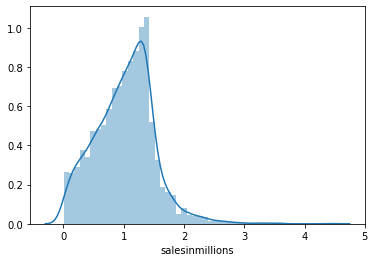

In [257]:
sns.distplot(np.log1p(train['salesinmillions']));

In [60]:
# train['salesinmillions'] = np.log1p(train['salesinmillions'])

In [268]:
train.head()

,id,console,year,category,publisher,rating,critics_points,user_points,salesinmillions,source
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257,train
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050,train
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402,train
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964,train
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671,train


In [297]:
data = pd.concat([train,test],axis=0);

C:\Users\RAKESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [298]:
# data['avg_critics_per_year']=data.groupby(['year'])['critics_points'].transform('mean')
# data['avg_critics_Category']=data.groupby(['category'])['critics_points'].transform('mean')
# data['avg_critics_publisher']=data.groupby(['publisher'])['critics_points'].transform('mean')
# data['avg_critics_rating']=data.groupby(['rating'])['critics_points'].transform('mean')
# data['avg_critics_per_console'] = data.groupby(['console'])['critics_points'].transform('mean')

# data['avg_userpts_per_year']=data.groupby(['year'])['user_points'].transform('mean')
# data['avg_userpts_Category']=data.groupby(['category'])['user_points'].transform('mean')
# data['avg_userpts_publisher']=data.groupby(['publisher'])['user_points'].transform('mean')
# data['avg_userpts_rating']=data.groupby(['rating'])['user_points'].transform('mean')
# data['avg_userpts_console']=data.groupby(['console'])['user_points'].transform('mean')

data['std_critics_per_year']=data.groupby(['year'])['critics_points'].transform('std')
data['std_critics_Category']=data.groupby(['category'])['critics_points'].transform('std')
data['std_critics_publisher']=data.groupby(['publisher'])['critics_points'].transform('std')
data['std_critics_rating']=data.groupby(['rating'])['critics_points'].transform('std')
data['std_critics_per_console'] = data.groupby(['console'])['critics_points'].transform('std')

data['std_userpts_per_year']=data.groupby(['year'])['user_points'].transform('std')
data['std_userpts_Category']=data.groupby(['category'])['user_points'].transform('std')
data['std_userpts_publisher']=data.groupby(['publisher'])['user_points'].transform('std')
data['std_userpts_rating']=data.groupby(['rating'])['user_points'].transform('std')
data['std_userpts_console']=data.groupby(['console'])['user_points'].transform('std')

# data['var_critics_per_year']=data.groupby(['year'])['critics_points'].transform('var')
# data['var_critics_Category']=data.groupby(['category'])['critics_points'].transform('var')
# data['var_critics_publisher']=data.groupby(['publisher'])['critics_points'].transform('var')
# data['var_critics_rating']=data.groupby(['rating'])['critics_points'].transform('var')
# data['var_critics_per_console'] = data.groupby(['console'])['critics_points'].transform('var')

# data['var_userpts_per_year']=data.groupby(['year'])['user_points'].transform('var')
# data['var_userpts_Category']=data.groupby(['category'])['user_points'].transform('var')
# data['var_userpts_publisher']=data.groupby(['publisher'])['user_points'].transform('var')
# data['var_userpts_rating']=data.groupby(['rating'])['user_points'].transform('var')
# data['var_userpts_console']=data.groupby(['console'])['user_points'].transform('var')

# data['cumsum_critics_per_year']=data.groupby(['year'])['critics_points'].transform('cumsum')
# data['cumsum_critics_Category']=data.groupby(['category'])['critics_points'].transform('cumsum')
# data['cumsum_critics_publisher']=data.groupby(['publisher'])['critics_points'].transform('cumsum')
# data['cumsum_critics_rating']=data.groupby(['rating'])['critics_points'].transform('cumsum')
# data['cumsum_critics_per_console'] = data.groupby(['console'])['critics_points'].transform('cumsum')

# data['cumsum_userpts_per_year']=data.groupby(['year'])['user_points'].transform('cumsum')
# data['cumsum_userpts_Category']=data.groupby(['category'])['user_points'].transform('cumsum')
# data['cumsum_userpts_publisher']=data.groupby(['publisher'])['user_points'].transform('cumsum')
# data['cumsum_userpts_rating']=data.groupby(['rating'])['user_points'].transform('cumsum')
# data['cumsum_userpts_console']=data.groupby(['console'])['user_points'].transform('cumsum')

# data['cumcnt_critics_per_year']=data.groupby(['year'])['critics_points'].transform('cumcount')
# data['cumcnt_critics_Category']=data.groupby(['category'])['critics_points'].transform('cumcount')
# data['cumcnt_critics_publisher']=data.groupby(['publisher'])['critics_points'].transform('cumcount')
# data['cumcnt_critics_rating']=data.groupby(['rating'])['critics_points'].transform('cumcount')
# data['cumcnt_critics_per_console'] = data.groupby(['console'])['critics_points'].transform('cumcount')

# data['cumcnt_userpts_per_year']=data.groupby(['year'])['user_points'].transform('cumcount')
# data['cumcnt_userpts_Category']=data.groupby(['category'])['user_points'].transform('cumcount')
# data['cumcnt_userpts_publisher']=data.groupby(['publisher'])['user_points'].transform('cumcount')
# data['cumcnt_userpts_rating']=data.groupby(['rating'])['user_points'].transform('cumcount')
# data['cumcnt_userpts_console']=data.groupby(['console'])['user_points'].transform('cumcount')

In [299]:
data.head()

,category,console,critics_points,id,publisher,rating,salesinmillions,source,user_points,year,std_critics_per_year,std_critics_Category,std_critics_publisher,std_critics_rating,std_critics_per_console,std_userpts_per_year,std_userpts_Category,std_userpts_publisher,std_userpts_rating,std_userpts_console
0,role-playing,ds,2.833333,2860,Nintendo,E,1.779257,train,0.303704,2008,2.838244,2.427566,2.218425,3.463835,3.428850,0.437125,0.344126,0.292835,0.498064,0.507285
1,simulation,wii,13.200000,731,Konami Digital Entertainment,E10+,0.215050,train,1.640000,2012,3.401621,3.442333,3.621253,3.748816,3.279363,0.379547,0.437370,0.531402,0.462838,0.462826
2,shooter,pc,4.562500,495,Activision,M,0.534402,train,0.006410,2019,3.938252,2.308502,3.643554,2.193401,3.222330,0.211587,0.379063,0.474123,0.294694,0.231486
3,sports,ps2,4.181818,2641,Electronic Arts,E,1.383964,train,0.326923,2002,3.053653,3.238821,2.782299,3.463835,2.589157,0.523715,0.503256,0.420955,0.498064,0.440794
4,action,ps3,2.259259,811,Activision,M,0.082671,train,0.032579,2013,3.409524,3.340823,3.643554,2.193401,2.854255,0.348499,0.419673,0.474123,0.294694,0.307493


In [300]:
X = data[data['source']=='train']
X = X.drop(['id','salesinmillions','source'], axis=1)
y = train['salesinmillions']
Xt = data[data['source']=='test']
Xt = Xt.drop(['id','source'],axis=1)

In [301]:
def one_hot_encode(train_data, test_data, columns):
    '''Returns a DataFrame with encoded columns'''
    conc = pd.concat([train_data, test_data], axis=0)
    encoded_cols = []
    for col in columns:
        encoded_cols.append(pd.get_dummies(conc[col], prefix='one_hot_'+col, 
                                      drop_first=True))
    all_encoded = pd.concat(encoded_cols, axis=1)
    return all_encoded

X.drop(['year','category', 'console','rating','publisher'], axis=1, inplace=True)
Xt.drop(['year','category', 'console','rating','publisher'], axis=1, inplace=True)

cols = ['year','category','console','publisher','rating']
target = 'salesinmillions'
finaldf = one_hot_encode(train,test,cols)

train_encoded = finaldf.iloc[0:3506,:]
test_encoded = finaldf.iloc[3506:,:]

merged_train_data = pd.concat([X,train_encoded],axis=1)
merged_test_data = pd.concat([Xt,test_encoded],axis=1)

X = merged_train_data.copy()
Xt = merged_test_data.copy()

C:\Users\RAKESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [204]:
# def frequency_encoding(column, df, df_test=None):
#     frequencies = df[column].value_counts().reset_index()
#     df_values = df[[column]].merge(frequencies, how='left', 
#                                    left_on=column, right_on='index').iloc[:,-1].values
#     if df_test is not None:
#         df_test_values = df_test[[column]].merge(frequencies, how='left', 
#                                                  left_on=column, right_on='index').fillna(1).iloc[:,-1].values
#     else:
#         df_test_values = None
#     return df_values, df_test_values

# for column in ['year','category', 'console','rating','publisher']:
#     train_values, test_values = frequency_encoding(column, X, Xt)
#     X[column+'_counts'] = train_values
#     Xt[column+'_counts'] = test_values
    
# X.drop(['year','category', 'console','rating','publisher'], axis=1, inplace=True)
# Xt.drop(['year','category', 'console','rating','publisher'], axis=1, inplace=True)

In [285]:
def mean_encode(train_data, test_data, columns, target_col, reg_method=None,
                alpha=5, add_random=False, rmean=0, rstd=0.1, folds=1):
    '''Returns a DataFrame with encoded columns'''
    encoded_cols = []
    target_mean_global = train_data[target_col].mean()
    for col in columns:
        # Getting means for test data
        nrows_cat = train_data.groupby(col)[target_col].count()
        target_means_cats = train_data.groupby(col)[target_col].mean()
        target_means_cats_adj = (target_means_cats*nrows_cat + 
                                 target_mean_global*alpha)/(nrows_cat+alpha)
        # Mapping means to test data
        encoded_col_test = test_data[col].map(target_means_cats_adj)
        # Getting a train encodings
        if reg_method == 'expanding_mean':
            train_data_shuffled = train_data.sample(frac=1, random_state=1)
            cumsum = train_data_shuffled.groupby(col)[target_col].cumsum() - train_data_shuffled[target_col]
            cumcnt = train_data_shuffled.groupby(col).cumcount()
            encoded_col_train = cumsum/(cumcnt)
            encoded_col_train.fillna(target_mean_global, inplace=True)
            if add_random:
                encoded_col_train = encoded_col_train + normal(loc=rmean, scale=rstd, 
                                                               size=(encoded_col_train.shape[0]))
        elif (reg_method == 'k_fold') and (folds > 1):
            kfold = KFold( n_splits = 10, shuffle = False)
            parts = []
            for tr_in, val_ind in kfold.split(train_data):
                # divide data
                df_for_estimation, df_estimated = train_data.iloc[tr_in], train_data.iloc[val_ind]
                # getting means on data for estimation (all folds except estimated)
                nrows_cat = df_for_estimation.groupby(col)[target_col].count()
                target_means_cats = df_for_estimation.groupby(col)[target_col].mean()
                target_means_cats_adj = (target_means_cats*nrows_cat + 
                                         target_mean_global*alpha)/(nrows_cat+alpha)
                # Mapping means to estimated fold
                encoded_col_train_part = df_estimated[col].map(target_means_cats_adj)
                if add_random:
                    encoded_col_train_part = encoded_col_train_part + normal(loc=rmean, scale=rstd, 
                                                                             size=(encoded_col_train_part.shape[0]))
                # Saving estimated encodings for a fold
                parts.append(encoded_col_train_part)
            encoded_col_train = pd.concat(parts, axis=0)
            encoded_col_train.fillna(target_mean_global, inplace=True)
        else:
            encoded_col_train = train_data[col].map(target_means_cats_adj)
            if add_random:
                encoded_col_train = encoded_col_train + normal(loc=rmean, scale=rstd, 
                                                               size=(encoded_col_train.shape[0]))

        # Saving the column with means
        encoded_col = pd.concat([encoded_col_train, encoded_col_test], axis=0)
        encoded_col[encoded_col.isnull()] = target_mean_global
        encoded_cols.append(pd.DataFrame({'mean_'+target_col+'_'+col:encoded_col}))
    all_encoded = pd.concat(encoded_cols, axis=1)
    return all_encoded

In [286]:
X.drop(['year','category', 'console','rating','publisher'], axis=1, inplace=True)
Xt.drop(['year','category', 'console','rating','publisher'], axis=1, inplace=True)

cols = ['year','category','console','publisher','rating']
target = 'salesinmillions'
finaldf = mean_encode(train,test,cols,target,reg_method='k_fold',folds=10)

train_encoded = finaldf.iloc[0:3506,:]
test_encoded = finaldf.iloc[3506:,:]

merged_train_data = pd.concat([X,train_encoded],axis=1)
merged_test_data = pd.concat([Xt,test_encoded],axis=1)

X = merged_train_data.copy()
Xt = merged_test_data.copy()

In [302]:
features = [cols for cols in X.columns]
features

['critics_points',
 'user_points',
 'std_critics_per_year',
 'std_critics_Category',
 'std_critics_publisher',
 'std_critics_rating',
 'std_critics_per_console',
 'std_userpts_per_year',
 'std_userpts_Category',
 'std_userpts_publisher',
 'std_userpts_rating',
 'std_userpts_console',
 'one_hot_year_1994',
 'one_hot_year_1997',
 'one_hot_year_1998',
 'one_hot_year_1999',
 'one_hot_year_2000',
 'one_hot_year_2001',
 'one_hot_year_2002',
 'one_hot_year_2003',
 'one_hot_year_2004',
 'one_hot_year_2005',
 'one_hot_year_2006',
 'one_hot_year_2007',
 'one_hot_year_2008',
 'one_hot_year_2009',
 'one_hot_year_2010',
 'one_hot_year_2011',
 'one_hot_year_2012',
 'one_hot_year_2013',
 'one_hot_year_2014',
 'one_hot_year_2015',
 'one_hot_year_2016',
 'one_hot_year_2017',
 'one_hot_year_2018',
 'one_hot_year_2019',
 'one_hot_category_adventure',
 'one_hot_category_fighting',
 'one_hot_category_misc',
 'one_hot_category_platform',
 'one_hot_category_puzzle',
 'one_hot_category_racing',
 'one_hot_cate

In [303]:
X.head()

,critics_points,user_points,std_critics_per_year,std_critics_Category,std_critics_publisher,std_critics_rating,std_critics_per_console,std_userpts_per_year,std_userpts_Category,std_userpts_publisher,...,one_hot_publisher_Yacht Club Games,one_hot_publisher_Zoo Digital Publishing,one_hot_publisher_Zoo Games,one_hot_publisher_Zushi Games,one_hot_rating_E,one_hot_rating_E10+,one_hot_rating_K-A,one_hot_rating_M,one_hot_rating_RP,one_hot_rating_T
0,2.833333,0.303704,2.838244,2.427566,2.218425,3.463835,3.428850,0.437125,0.344126,0.292835,...,0,0,0,0,1,0,0,0,0,0
1,13.200000,1.640000,3.401621,3.442333,3.621253,3.748816,3.279363,0.379547,0.437370,0.531402,...,0,0,0,0,0,1,0,0,0,0
2,4.562500,0.006410,3.938252,2.308502,3.643554,2.193401,3.222330,0.211587,0.379063,0.474123,...,0,0,0,0,0,0,0,1,0,0
3,4.181818,0.326923,3.053653,3.238821,2.782299,3.463835,2.589157,0.523715,0.503256,0.420955,...,0,0,0,0,1,0,0,0,0,0
4,2.259259,0.032579,3.409524,3.340823,3.643554,2.193401,2.854255,0.348499,0.419673,0.474123,...,0,0,0,0,0,0,0,1,0,0


In [288]:
rmse_cv = list()
max_iter = 20
folds = StratifiedKFold(n_splits = max_iter)
oofs = np.zeros(len(X))
test_preds = np.zeros(len(Xt))


for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, pd.qcut(y, 10, labels=False, duplicates='drop'))):
    
    print(f'\n---- Fold {fold_} -----\n')
    
    X_trn, y_trn = X.iloc[trn_idx][features], y.iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx][features], y.iloc[val_idx]
    X_test = Xt[features]
    
    print(X_trn.shape[1], X_val.shape[1])
     
    lgbm = LGBMRegressor(n_estimators=1000, num_leaves=127, max_depth=8,min_child_samples=4, learning_rate=0.02, colsample_bytree=0.4, reg_alpha=0.5, reg_lambda=2)
    _ = lgbm.fit(X_trn, np.log1p(y_trn), eval_set = [(X_val, np.log1p(y_val))], verbose=100, early_stopping_rounds=100, eval_metric='rmse')

    oofs[val_idx] = np.expm1(lgbm.predict(X_val))
    current_test_pred = np.expm1(lgbm.predict(X_test))
    test_preds += np.expm1(lgbm.predict(X_test))/max_iter
    
    print(f'\n Fold {rmse(np.log1p(y_val), np.log1p(oofs[val_idx]))}')
    
    rmse_cv = np.append(rmse_cv, rmse(np.log1p(y_val), np.log1p(oofs[val_idx])))
    
    
print(f'\nOOF val score: {rmse(np.log1p(y), np.log1p(oofs))}')
print(f'Mean rmsle: {np.mean(rmse_cv):.4f} and std Dev. is {np.std(rmse_cv):.2f} \n')


---- Fold 0 -----

17 17
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.426904	valid_0's l2: 0.182247
[200]	valid_0's rmse: 0.42488	valid_0's l2: 0.180523
Early stopping, best iteration is:
[150]	valid_0's rmse: 0.423932	valid_0's l2: 0.179718

 Fold 0.4239316735533061

---- Fold 1 -----

17 17
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.444976	valid_0's l2: 0.198004
[200]	valid_0's rmse: 0.443256	valid_0's l2: 0.196476
Early stopping, best iteration is:
[175]	valid_0's rmse: 0.442701	valid_0's l2: 0.195984

 Fold 0.44270108688528786

---- Fold 2 -----

17 17
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.458961	valid_0's l2: 0.210646
[200]	valid_0's rmse: 0.456123	valid_0's l2: 0.208048
Early stopping, best iteration is:
[150]	valid_0's rmse: 0.454306	valid_0's l2: 0.206394

 Fold 0.4543057285611157

---- Fold 3 -----

17 17
Training until validation scores don't im

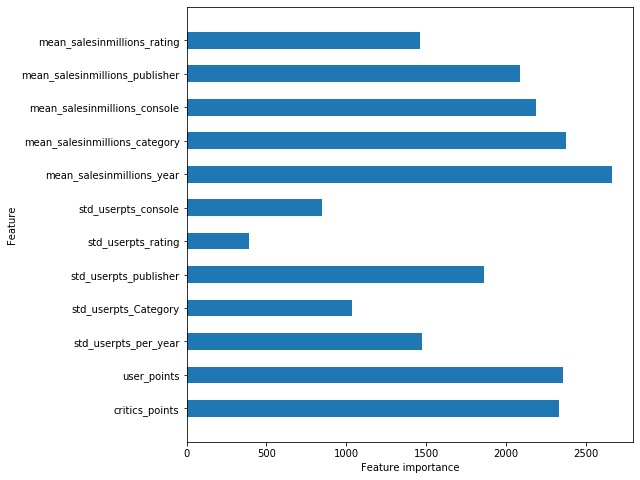

In [231]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    plt.figure(figsize=(8,8))
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, height=0.5,align='center',)
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(lgbm)

In [289]:
vp0, tp0 = oofs, test_preds
# 0.4496940355261786
# 0.44685382388862915 (Mean rmsle: 0.4466 and std Dev. is 0.02) freq encoding & grouping std feats
# 0.4428785719058245Mean rmsle: 0.4426 and std Dev. is 0.02 mean encoding & grouping std feats

In [290]:
sub = pd.DataFrame({'SalesInMillions': tp0})
sub['SalesInMillions'] = np.clip(sub['SalesInMillions'], y.min(), y.max())
sub['SalesInMillions'].describe()

count    1503.000000
mean        1.865007
std         0.738636
min         1.072125
25%         1.521691
50%         1.691890
75%         1.972025
max        11.050559
Name: SalesInMillions, dtype: float64

In [291]:
SUB_FILE_NAME = 'groupedstd_TME_lgbm.xlsx'
sub.to_excel(SUB_FILE_NAME, index=False)

In [304]:
rmse_cv = list()
max_iter = 10
folds = StratifiedKFold(n_splits = max_iter)
oofs = np.zeros(len(X))
test_preds = np.zeros(len(Xt))


for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, pd.qcut(y, 10, labels=False, duplicates='drop'))):
    
    print(f'\n---- Fold {fold_} -----\n')
    
    X_trn, y_trn = X.iloc[trn_idx][features], y.iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx][features], y.iloc[val_idx]
    X_test = Xt[features]
    print(X_trn.shape[1], X_val.shape[1])
    

    cat = CatBoostRegressor(n_estimators=2000, learning_rate=0.05,max_depth=9, rsm=0.5,random_seed=123)
    _ = cat.fit(X_trn, np.log1p(y_trn), eval_set = [(X_val, np.log1p(y_val))], verbose=100, early_stopping_rounds=100)
    
    oofs[val_idx] = np.expm1(cat.predict(X_val))
    current_test_pred = np.expm1(cat.predict(X_test))
    test_preds += np.expm1(cat.predict(X_test))/max_iter
    
    print(f'\n Fold {rmse(np.log1p(y_val), np.log1p(oofs[val_idx]))}')
    rmse_cv = np.append(rmse_cv, rmse(np.log1p(y_val), np.log1p(oofs[val_idx])))
    

print(f'\nOOF val score: {rmse(np.log1p(y), np.log1p(oofs))}')
print(f'Mean rmsle: {np.mean(rmse_cv):.4f} and std Dev. is {np.std(rmse_cv):.2f} \n')


---- Fold 0 -----

301 301
0:	learn: 0.4907501	test: 0.4677140	best: 0.4677140 (0)	total: 9.86ms	remaining: 19.7s
100:	learn: 0.3961740	test: 0.4372097	best: 0.4357674 (58)	total: 2.83s	remaining: 53.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4357673578
bestIteration = 58

Shrink model to first 59 iterations.

 Fold 0.4357673557084863

---- Fold 1 -----

301 301
0:	learn: 0.4883413	test: 0.4820049	best: 0.4820049 (0)	total: 22.7ms	remaining: 45.4s
100:	learn: 0.3977378	test: 0.4374163	best: 0.4373860 (99)	total: 2.74s	remaining: 51.6s
200:	learn: 0.3601794	test: 0.4376725	best: 0.4368909 (184)	total: 5.43s	remaining: 48.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4368908763
bestIteration = 184

Shrink model to first 185 iterations.

 Fold 0.43689087643839974

---- Fold 2 -----

301 301
0:	learn: 0.4880192	test: 0.4878063	best: 0.4878063 (0)	total: 28.9ms	remaining: 57.8s
100:	learn: 0.3945813	test: 0.4458711	best: 0.4458711 (100

In [ ]:
plot_feature_importances(cat)

In [306]:
vp1,tp1 = oofs, test_preds

In [307]:
sub = pd.DataFrame({'SalesInMillions': tp1})
sub['SalesInMillions'] = np.clip(sub['SalesInMillions'], y.min(), y.max())
sub['SalesInMillions'].describe()

count    1503.000000
mean        1.809689
std         0.719403
min         1.038538
25%         1.484932
50%         1.628585
75%         1.852670
max        10.345922
Name: SalesInMillions, dtype: float64

In [308]:
SUB_FILE_NAME = 'groupedstd_OHE_cat.xlsx'
sub.to_excel(SUB_FILE_NAME, index=False)
# 0.4421 & 0.01   freq encoding & grouping std feats
# 0.43893331395362983  0.4388 and std Dev. is 0.01 mean encoding & grouping std feats
# 0.4438594885984737 0.4437 and std Dev. is 0.01 one hot encoding & grouping std feats